# Reinforcement Learning

The goal for all algorithms used here is to solve the "multi armed bandit" problem, with simulated ad "click through" data.

### Imports

In [15]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Upper Confidence Bound (UCB)
This is a deterministic algorithm.

In [3]:
data = pd.read_csv("../Data/Ads_CTR_Optimisation.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


In [5]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [9]:
len(data.columns)

10

This is simulated data, which can be explained as follows. Each row corresponds to a user, and each columns represents an ad shown to a user, and, as such, each row/column point represents a round where a user was shown an add and they either clicked through (1) or did not click through (0).

### Implementing Random Selection

In [10]:
import random

In [11]:
ads_selected = []
total_reward = 0
for n in range(len(data)):
    ad = random.randrange(10)
    ads_selected.append(ad)
    reward = data.values[n, ad]
    total_reward += reward

In [12]:
total_reward

1261

### Visualizing the Results of Random Selection

Text(0, 0.5, 'Number of Times an Ad was Selected')

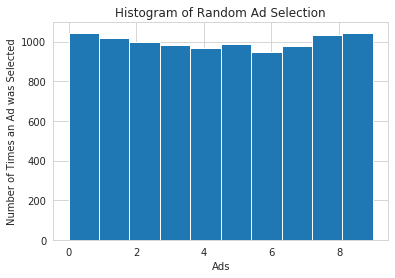

In [13]:
plt.hist(ads_selected)
plt.title("Histogram of Random Ad Selection")
plt.xlabel("Ads")
plt.ylabel("Number of Times an Ad was Selected")

### Implementing UCB

In [41]:
times_selected = np.zeros(len(data.columns))
sum_reward = np.zeros(len(data.columns))
total_reward = 0
ads_selected = []

In [42]:
for n in range(len(data)):
    ad = 0
    max_UB = 0
    for i in range(len(data.columns)):
        if times_selected[i] > 0:
            average_reward = sum_reward[i]/times_selected[i]
            del_i = math.sqrt(3/2 * math.log(n + 1)/times_selected[i])
            upper_bound = average_reward + del_i
        else:
            upper_bound = 1e400
        if upper_bound > max_UB:
            max_UB = upper_bound
            ad = i
    ads_selected.append(ad)
    times_selected[ad] += 1
    reward = data.values[n, ad]
    sum_reward[ad] += reward
    total_reward += reward

In [43]:
total_reward

2178

Text(0.5, 1.0, 'Click Through Rate for Eacch Ad')

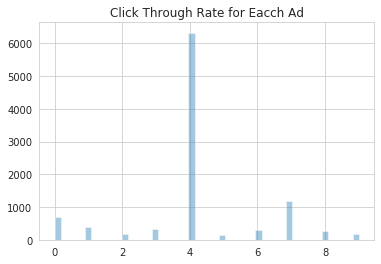

In [51]:
sns.distplot(ads_selected, kde = False)
plt.title("Click Through Rate for Each Ad - UCB")

## Thompson Sampling
This is a probabilistic model.

In [52]:
times_rewarded_1 = np.zeros(len(data.columns))
times_rewarded_0 = np.zeros(len(data.columns))
total_reward = 0

In [54]:
for n in range(len(data)):
    ad = 0
    max_Rand = 0
    for i in range(len(data.columns)):
        random_beta = random.betavariate(times_rewarded_1[i] + 1, times_rewarded_0[i] + 1)
        if random_beta > max_Rand:
            max_Rand = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data.values[n, ad]
    if reward == 1:
        times_rewarded_1[ad] += 1
    else:
        times_rewarded_0[ad] += 1
    total_reward += reward

In [55]:
total_reward

2595

Text(0.5, 1.0, "Click Through Rate for Each Ad - Thompson's")

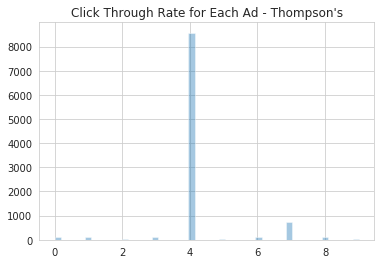

In [58]:
sns.distplot(ads_selected, kde = False)
plt.title("Click Through Rate for Each Ad - Thompson's")